## NumPy 数组 ndarray 

NumPy 中最基本的概念是 ndarray 对象，即封装了相同数据类型的 n 维数组，它与 Python 中的列表 list 之间的区别可以参照下图，

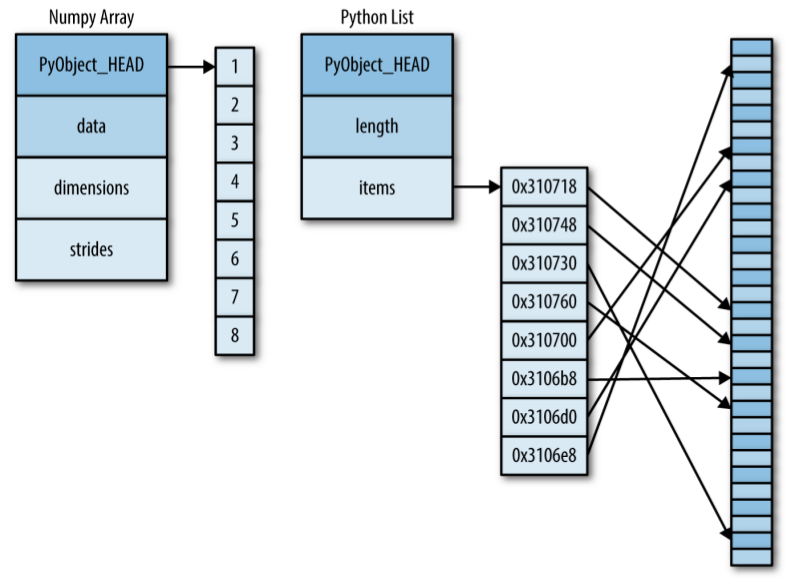

NumPy 数组中的元素都需要具有相同的数据类型，因此在内存中的大小相同，而 list 中的元素允许各种数据类型，因此存放的是每个元素的地址。
NumPy 数组对数据的操作更加高效，是使用 Python 开发的大部分科学计算工具的底层基础包。

#### 首先看下图了解 ndarray 最基本的几个属性
- 数组元素的数据类型，dtype
- 数组的维度（轴的个数），ndim
- 各个轴上的长度 shape 以及步长 strides 等

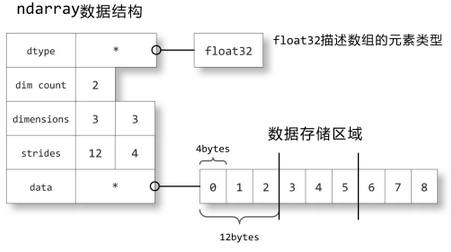

接下来结合实际操作来加深对这些属性的认识。

## 基本属性

In [2]:
import numpy as np

In [85]:
np.__version__

'1.17.4'

下面先创建数组，再查看数组的基本属性。

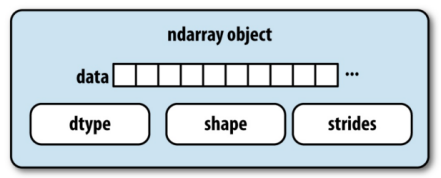

### 1 维数组

In [3]:
arr_1d = np.array([7, 2, 9, 10])

下面语句显示，arr_1d 是一个 1 维数组，只有 1 个轴，shape 只有 1 个数字。

In [5]:
# 轴数
arr_1d.ndim

1

In [6]:
# 形状
arr_1d.shape

(4,)

In [7]:
# 数据类型
arr_1d.dtype

dtype('int64')

### 2 维和 3 维数组

In [9]:
# 直接用 嵌套 list 来创建一个二维数组
arr_2d = np.array([[5.2,3.0,4.5],[9.1,0.1,0.3]])

In [10]:
print(('Dim = {0}, shape = {1}, dtype = {2}, strides = {3}')\
      .format(arr_2d.ndim, arr_2d.shape, arr_2d.dtype, arr_2d.strides))

Dim = 2, shape = (2, 3), dtype = float64, strides = (24, 8)


In [11]:
# 三维数组，np.arange(24) 先创建一个一维数组，再使用 reshape 将之转化为三维数组
arr_3d = np.arange(24).reshape(4, 3, 2)
arr_3d

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

### 轴

对于轴的说明，几维数组对应几个轴，对轴的编号从 0 开始。请看下图，

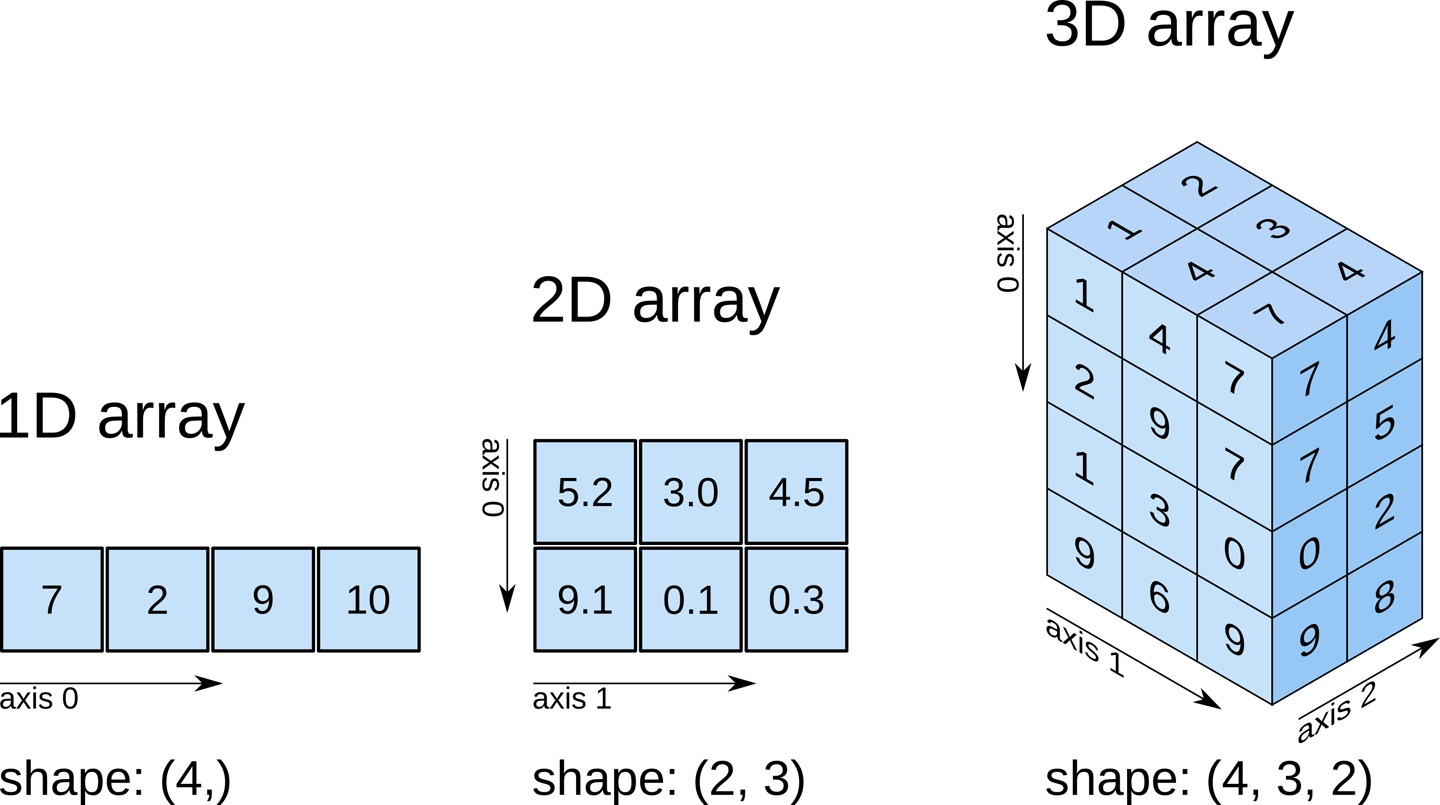

### 步长

In [14]:
# 创建一个三维数组并查看其各个轴上的步长。注意跟上面创建三维数组时的区别
xyz = np.reshape(np.arange(2*3*4), (4,3,2))
xyz.strides

(48, 16, 8)

结合下面语句的结果理解步长 strides 的各个数字的含义以及每个元素占的字节数 itemsize。

In [15]:
# 数组在各个轴上的步长
xyz.strides

(48, 16, 8)

In [17]:
# 数组中每个元素占的字节长度
xyz.itemsize

8

### 思考

In [0]:
# 看看下面几句是在计算什么？

In [18]:
offset = sum(xyz.strides * np.array((1,1,1)))
offset

72

In [19]:
offset//xyz.itemsize

9

In [20]:
xyz[1,1,1]

9

### 高维数组

In [21]:
# 高维数组的创建
arr_4d = np.arange(32).reshape(4,2,2,2)
arr_4d

array([[[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]]],


       [[[ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15]]],


       [[[16, 17],
         [18, 19]],

        [[20, 21],
         [22, 23]]],


       [[[24, 25],
         [26, 27]],

        [[28, 29],
         [30, 31]]]])

In [23]:
# 自己查看各个属性，验证一下是否正确，如
arr_4d.shape

(4, 2, 2, 2)

### NumPy 数组支持的数据类型 dtype

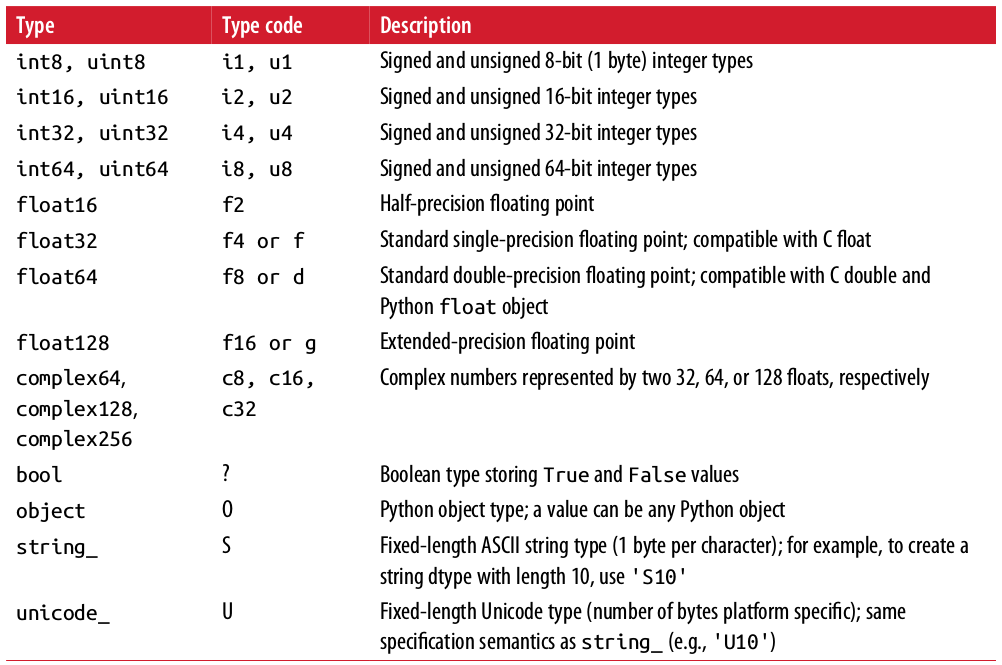

In [24]:
# 查看本机默认整型数组的元素类型
arr_1d.dtype

dtype('int64')

In [25]:
# 修改元素类型
arr_1d_float32 = arr_1d.astype(np.float32)
arr_1d_float32

array([ 7.,  2.,  9., 10.], dtype=float32)

In [26]:
arr_1d_float32.itemsize

4

In [27]:
arr_1d_float64 = arr_1d.astype(np.float64)
arr_1d_float64

array([ 7.,  2.,  9., 10.])

In [28]:
arr_1d_float64.itemsize

8

用其他数组的数据类型指定，

In [30]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [31]:
arr_int = np.arange(10)
arr_int.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [32]:
arr_int.dtype

dtype('int64')

上面语句并不修改 arr_int 的数据类型。正确的姿势为，

In [33]:
arr_float64 = arr_int.astype(calibers.dtype)

In [35]:
arr_float64.dtype

dtype('float64')

## 索引和切片

### 单元素索引

数组单元素索引指的是使用方括号 [] 指定下标来引用数组中的单个元素值，
- NumPy 数组支持多维数组的多维索引，即不需要将每个维度的索引分开放在各自的一个方括号里，而是整体只用一个方括号！
- n 维数组有 n 个轴，因此需要 n 个下标来引用某个元素。

In [37]:
data = np.arange(9).reshape(3,3)
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [38]:
data[2,2]

8

In [39]:
# 当然，用多个括号引用单个元素也是可以的
data[2][2]

8

### 切片
通过切片可以访问和修改数组中的一系列数据，
- 数组切片不会复制内部数组数据，但会产生原始数据的新视图
- 通过使用冒号来实现切片操作，具体格式为 x[[start:stop:step],...,[start:stop:step],...,[start:stop:step]]


此时看图更清楚，从一个 6×6 的二维数组中，使用切片可以获取不同形状的数组。仔细看下图，注意语句的颜色和数组元素的颜色，

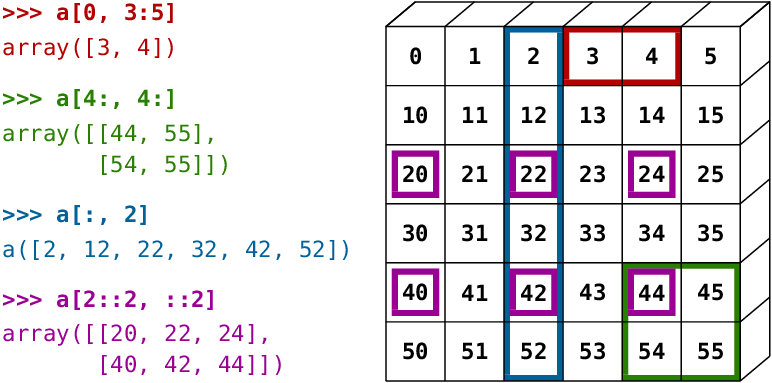

再看一个切片图例，从一个 3×3 的二维数组中，使用切片得到不同形状的数组。**注意冒号的个数与最终获取的子数组的轴数之间的关系。**

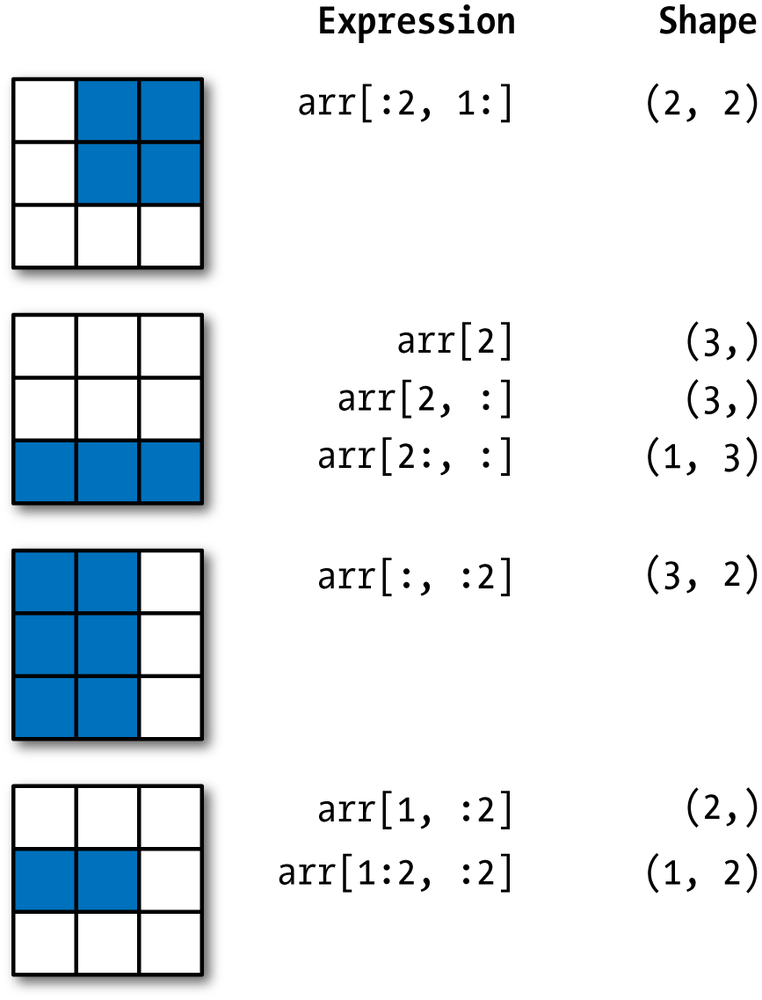

In [40]:
# 显示 data 的元素
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [41]:
# 只用一个维度时，默认是 0 轴
data[-1]

array([6, 7, 8])

In [43]:
# 注意，不包括冒号后的下标
data[1:2]

array([[3, 4, 5]])

In [44]:
data[1:-1]

array([[3, 4, 5]])

In [45]:
data[1:]

array([[3, 4, 5],
       [6, 7, 8]])

In [46]:
data = np.arange(24).reshape(2, 3, 4)

使用步长参数 step，

In [47]:
data[::1]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [48]:
data[::2]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [50]:
# 按 0 轴逆序
data[::-1]

array([[[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]],

       [[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [52]:
# 按最后一个轴逆序
data[...,::-1]

array([[[ 3,  2,  1,  0],
        [ 7,  6,  5,  4],
        [11, 10,  9,  8]],

       [[15, 14, 13, 12],
        [19, 18, 17, 16],
        [23, 22, 21, 20]]])

In [53]:
data[:, 2:3, 2:3]

data[0:-1]
data

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [54]:
data[:,:,1]

array([[ 1,  5,  9],
       [13, 17, 21]])

In [55]:
# 用省略号来表示其他所有维度
data[...,1]

array([[ 1,  5,  9],
       [13, 17, 21]])

In [56]:
a = data[...,:][...,0:3][...,0:1]
a.ndim

3

In [57]:
a

array([[[ 0],
        [ 4],
        [ 8]],

       [[12],
        [16],
        [20]]])

In [151]:
# 思考 data[0][1][1] = ？

## 布尔/模板索引

我们可以通过一个布尔数组来索引目标数组，以找出与布尔数组中值为 True 对应的目标数组中的数据。

布尔索引的结果是一维数组，即把符合条件的元素挑出来放入一个一维数组。布尔索引的形状必须与被索引数组的初始维度相同。

In [58]:
data = np.array([[1, 2, 3, 4],
       [2, 4, 6, 8],
       [3, 6, 9, 12],
       [4, 8, 12, 16]])
data

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16]])

In [59]:
mask = data > 6

In [60]:
mask

array([[False, False, False, False],
       [False, False, False,  True],
       [False, False,  True,  True],
       [False,  True,  True,  True]])

布尔索引的结果是一维数组，其中包含被索引数组中所有对应于布尔数组中所有真实元素（值为True）的元素。

In [61]:
data[mask]

array([ 8,  9, 12,  8, 12, 16])

In [156]:
np.isinf(np.array([1,2,np.inf]))

array([False, False,  True])

In [157]:
np.isnan(np.array([1,2,np.nan]))

array([False, False,  True])

**切片和模板索引的区别**
- 切片得到的是原多维数组的一个视图（view），修改切片中的内容会导致原多维数组的内容也发生变化
- 布尔 / 模板索引则产生新的数组

In [67]:
data = np.array([[1, 2, 3, 4],
                 [2, 4, 6, 8],
                 [3, 6, 9, 12],
                 [4, 8, 12, 16]])
data

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16]])

In [68]:
data_slice = data[1:,1:3]
data_slice[:,1:2] = 111

print(data_slice)
print(data)

[[  4 111]
 [  6 111]
 [  8 111]]
[[  1   2   3   4]
 [  2   4 111   8]
 [  3   6 111  12]
 [  4   8 111  16]]


In [70]:
data_copy = data[1:,1:3].copy()
data_copy[...] = 100

print(data_copy)
print(data)

[[100 100]
 [100 100]
 [100 100]]
[[  1   2   3   4]
 [  2   4 111   8]
 [  3   6 111  12]
 [  4   8 111  16]]


### 花式索引

花式索引类似于上面的单元素索引，但传递的是索引数组，而不是单个下标。这允许我们可以快速地引用和修改数组的复杂子集。

花式索引在概念上很简单，就是一次传递一个索引数组来访问多个数组元素。例如，考虑以下数组，

In [87]:
data = np.array([1, 2, 3, 5, 8, 13, 21, 34, 55])

我们可以这样来组合数组中的元素，

In [88]:
[data[3], data[2], data[1]]

[5, 3, 2]

但我们也可以传递单个列表或索引数组来获得相同的结果，

In [75]:
inds = [3, 2, 1]
data[inds]

array([5, 3, 2])

使用花式索引，还可以实现用索引数组的形状来指定结果的形状，

In [77]:
ind_arr = np.array([[3, 2], [4, 5]])
data[ind_arr]

array([[ 5,  3],
       [ 8, 13]])

花式索引也适用于多维数组，如

In [78]:
data = np.arange(12).reshape((3, 4))
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [79]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
data[row, col]

array([ 2,  5, 11])

结果中第一个元素是 data[0, 2]，第二个是 data[1, 1] 等等。
还可以结合下标的广播机制产生一个二维数组，如，

In [80]:
data[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

### np.take()

take 函数也可以按照索引值从数组中取出相应的元素，这点跟花式索引类似。如，

In [84]:
data.take([0,1,6])

array([0, 1, 6])

但是它还可以沿给定的轴获取元素，效率更高。如，

In [82]:
data.take([1,2],axis = 0)

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

本系列为入门教程，如需要稍微深入学习，请看公众号上其他系列文章。

我们的公众号为`机器学习与数学`，请扫描下面的二维码关注我们以阅读更多精彩文章，谢谢。

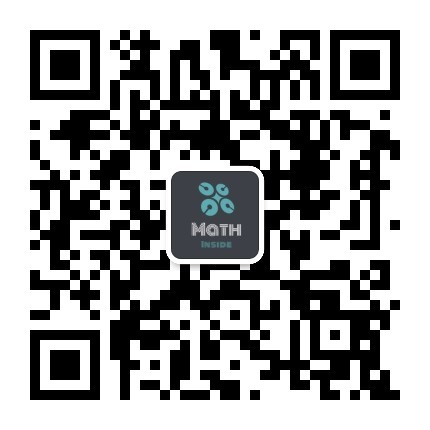